In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
data= pd.read_csv('nba-players.csv') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

In [76]:
data.head(10)

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


# Checking the dataset distribution 

In [77]:
data['target_5yrs'].value_counts()/len(data)

1    0.620149
0    0.379851
Name: target_5yrs, dtype: float64

# Seperating dependent and independent variable

In [78]:
X=data.drop(columns=['target_5yrs','Unnamed: 0','name'])
Y=data['target_5yrs']

In [79]:
X.shape

(1340, 19)

In [80]:
Y.shape

(1340,)

# Scaling the dataset

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

# Splitting the dataset

In [82]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80,stratify=Y,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1072, 19), (268, 19), (1072,), (268,))

# Model Building, predictions and odds ratio

In [83]:
from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test)
predicted_probabilities=classifier.predict_proba(x_test)
predicted_values
predicted_probabilities,predicted_probabilities.shape

(array([[0.1464746 , 0.8535254 ],
        [0.45443308, 0.54556692],
        [0.54506459, 0.45493541],
        [0.82464322, 0.17535678],
        [0.40468784, 0.59531216],
        [0.32889796, 0.67110204],
        [0.43319292, 0.56680708],
        [0.37439014, 0.62560986],
        [0.84207022, 0.15792978],
        [0.03715112, 0.96284888],
        [0.27543687, 0.72456313],
        [0.28012837, 0.71987163],
        [0.69085169, 0.30914831],
        [0.34231294, 0.65768706],
        [0.10849164, 0.89150836],
        [0.70497312, 0.29502688],
        [0.6932996 , 0.3067004 ],
        [0.77457323, 0.22542677],
        [0.69617388, 0.30382612],
        [0.86613953, 0.13386047],
        [0.22962713, 0.77037287],
        [0.57632612, 0.42367388],
        [0.64962231, 0.35037769],
        [0.30986281, 0.69013719],
        [0.84506521, 0.15493479],
        [0.68608053, 0.31391947],
        [0.6884927 , 0.3115073 ],
        [0.23513028, 0.76486972],
        [0.4526131 , 0.5473869 ],
        [0.492

In [84]:
y_train.shape

(1072,)

In [85]:
predicted_values.shape

(268,)

In [86]:
y_test.shape

(268,)

# Confusion matrix LR

In [87]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
cf

array([[ 75,  27],
       [ 54, 112]])

1.Accuracy

In [88]:
classifier.score(x_test,y_test)

0.6977611940298507

2.Calculating the precision score

In [89]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [90]:
precision

array([0.58139535, 0.8057554 ])

In [91]:
recall

array([0.73529412, 0.6746988 ])

In [92]:
f1

array([0.64935065, 0.73442623])

In [93]:
support

array([102, 166])

Only for representation

In [94]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.58      0.74      0.65       102
           1       0.81      0.67      0.73       166

    accuracy                           0.70       268
   macro avg       0.69      0.70      0.69       268
weighted avg       0.72      0.70      0.70       268



# Precision-Recall Curve LR

In [95]:
#gathering Precision/recall scores from different threshold
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((267,), (267,), (266,))

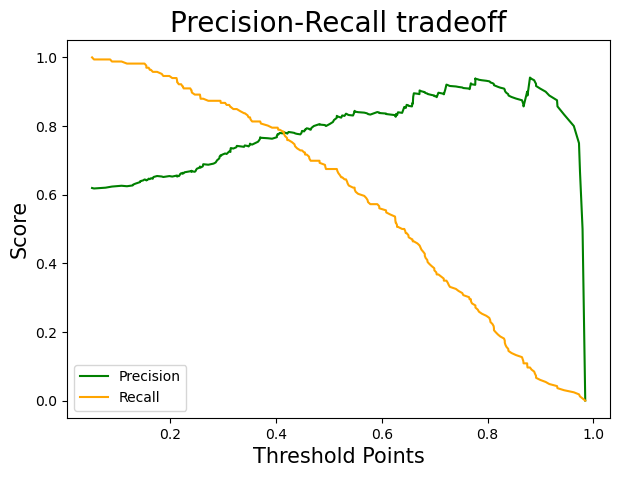

In [96]:
#compare if threshold is less than precision & recall 
#if less -1 minus in plotting
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color='green',label='Precision')
plt.plot(threshold_points,recall_points[:-1],color='orange',label='Recall')
plt.xlabel('Threshold Points',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('Precision-Recall tradeoff',fontsize=20)
plt.legend()

# AUC-ROC Curve LR

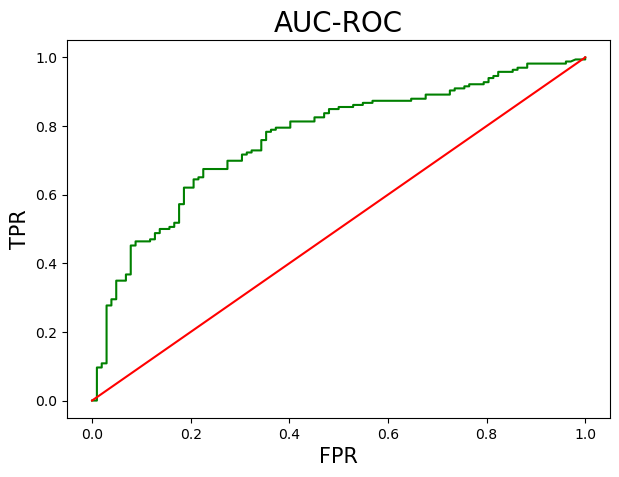

0.7650897708480984

In [97]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

# Coefficients Plot

In [98]:
#arranging the data
c=classifier.coef_.reshape(-1)
x=X.columns
coeff_plot=pd.DataFrame({
    'coefficients':c,
    'variable':x
})
#sorting the values
coeff_plot=coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variable
7,-0.766687,3pa
13,-0.361536,dreb
10,-0.355338,fta
1,-0.347459,min
18,-0.198380,tov


Text(0.5, 1.0, 'Coefficients plot')

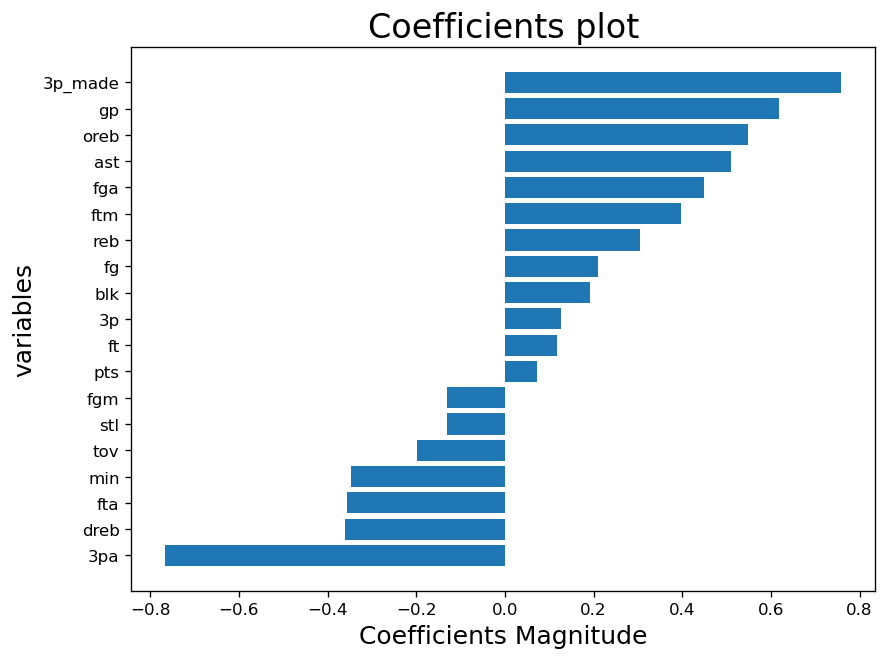

In [99]:
plt.figure(figsize=(8,6),dpi=120)
plt.barh(coeff_plot['variable'],coeff_plot['coefficients'])
plt.xlabel("Coefficients Magnitude",fontsize=15)
plt.ylabel('variables',fontsize=15)
plt.title('Coefficients plot',fontsize=20)

# Bagging

In [100]:
from sklearn.ensemble import BaggingClassifier as BC
classifier=BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [101]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(base_estimator=LR(),
               n_estimators=150,
              n_jobs=-1,
           random_state=42)
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.64      0.52      0.58       407
           1       0.74      0.82      0.78       665

    accuracy                           0.71      1072
   macro avg       0.69      0.67      0.68      1072
weighted avg       0.70      0.71      0.70      1072



In [103]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62       102
           1       0.76      0.80      0.78       166

    accuracy                           0.72       268
   macro avg       0.71      0.70      0.70       268
weighted avg       0.72      0.72      0.72       268



# Confusion matrix

In [104]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
cf

array([[ 61,  41],
       [ 33, 133]])

1. Accuracy

In [105]:
classifier.score(x_test,y_test)

0.7238805970149254

2. Calculating the precision score

In [106]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [107]:
precision

array([0.64893617, 0.76436782])

In [108]:
recall

array([0.59803922, 0.80120482])

In [109]:
f1

array([0.62244898, 0.78235294])

In [110]:
support #support is nothing but the no of instances for class 1 and class 0

array([102, 166])

Only for representation

In [111]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.65      0.60      0.62       102
           1       0.76      0.80      0.78       166

    accuracy                           0.72       268
   macro avg       0.71      0.70      0.70       268
weighted avg       0.72      0.72      0.72       268



# Precision-Recall Curve-Bagging

In [112]:
#gathering Precision/recall scores from different threshold
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((267,), (267,), (266,))

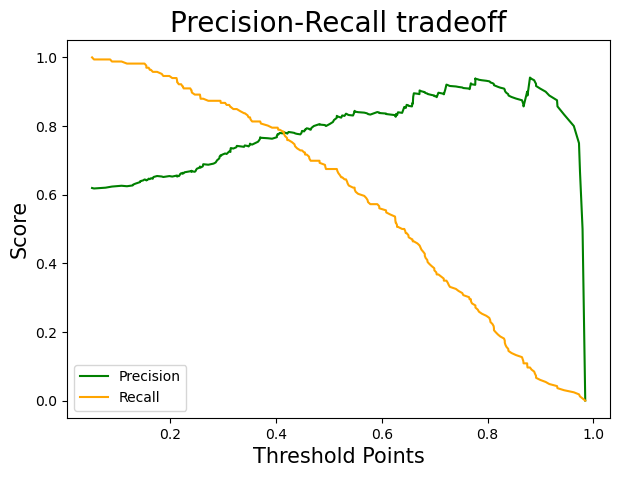

In [113]:
#compare if threshold is less than precision & recall 
#if less -1 minus in plotting
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color='green',label='Precision')
plt.plot(threshold_points,recall_points[:-1],color='orange',label='Recall')
plt.xlabel('Threshold Points',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('Precision-Recall tradeoff',fontsize=20)
plt.legend()

# AUC-ROC Curve-Bagging

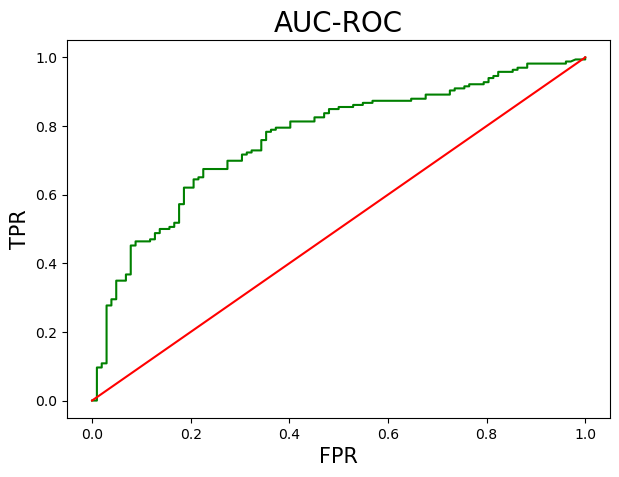

0.7650897708480984

In [114]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

# Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [116]:
classifier=RFC()
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       407
           1       0.99      1.00      0.99       665

    accuracy                           0.99      1072
   macro avg       0.99      0.99      0.99      1072
weighted avg       0.99      0.99      0.99      1072



In [117]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       102
           1       0.73      0.77      0.75       166

    accuracy                           0.68       268
   macro avg       0.66      0.66      0.66       268
weighted avg       0.68      0.68      0.68       268



In [118]:
#calc_score to take model and the data and return the performance of the model

In [119]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
 model.fit(x1,y1)
 predict=model.predict(x1)
 f1=f1_score(y1,predict)
 predict=model.predict(x2)
 f2=f1_score(y2,predict)
 return f1,f2

In [120]:
#effect to visualize how the different values of the parameter affect the performance of the model

In [121]:
def effect(train_score,test_score,x_axis,title):
    plt.figure(figsize=(7,4),dpi=120)
    plt.plot(x_axis,train_score,color='red',label='train_Score')
    plt.plot(x_axis,test_score,color='blue',label='test_Score')
    plt.title(title)
    plt.legend()
    plt.xlabel("parameter_value")
    plt.ylabel("f1_score")
    plt.show()

In [122]:
classifier=RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [123]:
estimators=[i for i in range(1,600,10)]
train=[]
test=[]
for i in estimators:
    model=RFC(class_weight='balanced_subsample',
             n_estimators=i,
             n_jobs=-1,
             max_depth=7,
             random_state=101)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

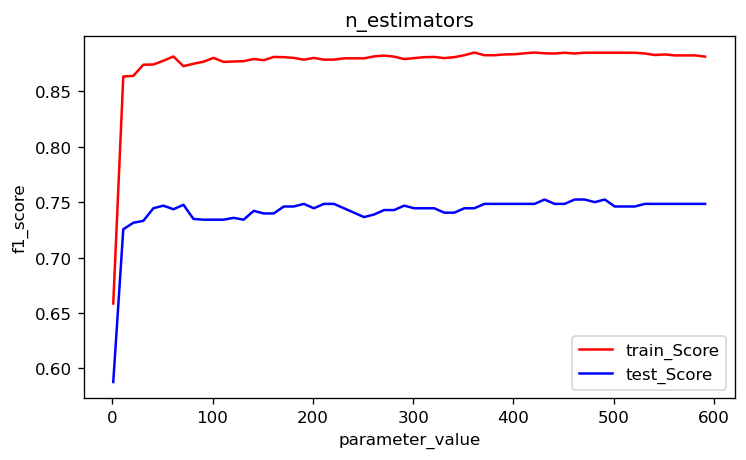

In [124]:
effect(train,test,range(1,600,10),'n_estimators')

# max_samples

In [125]:
maxsamples=[i/1000 for i in range(1,1000)]
train=[]
test=[]

for i in maxsamples:
    model=RFC(class_weight="balanced_subsample",n_estimators=50,
             n_jobs=-1,max_depth=7,random_state=101,max_samples=i)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

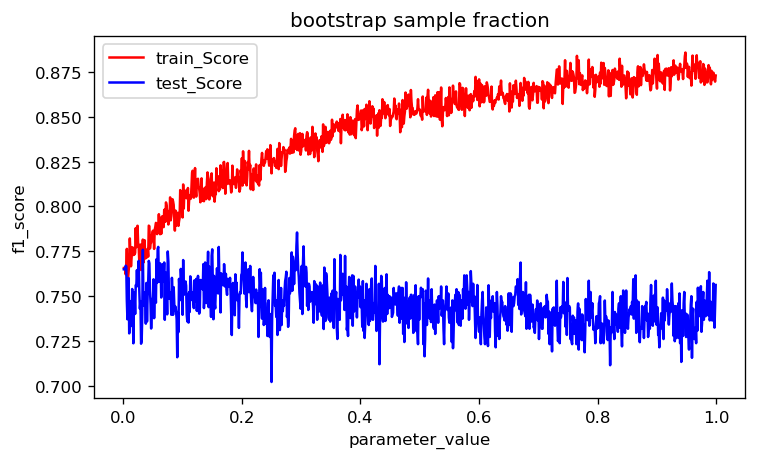

In [126]:
effect(train,test,maxsamples,'bootstrap sample fraction')

# max_features

In [135]:
maxfeatures=range(1,X.shape[1])
train=[]
test=[]

for i in maxfeatures:
 model=RFC(class_weight="balanced_subsample",n_estimators=50,
             n_jobs=-1,max_depth=7,random_state=101,max_features=i)
 f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
 train.append(f1)
 test.append(f2)

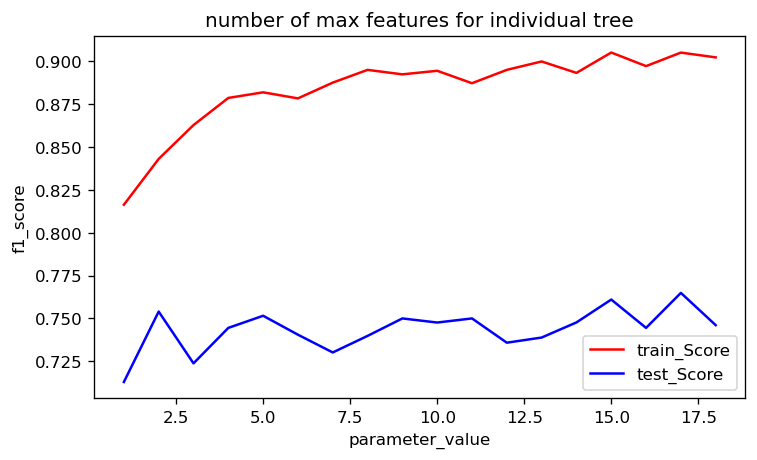

In [136]:
effect(train,test,maxfeatures,'number of max features for individual tree')

In [129]:
#default parameter value=sqrt(number of features present in the dataset)

In [137]:
#perform regularization to reduce overfitting spotted in maxfeatures